# **Import Library**

In [1]:
# Common
import os
import keras
import numpy as np
from PIL import Image
import random
import pandas as pd
import glob
import seaborn as sns
import sklearn.metrics as metrics

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt

# Tensorflow import
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, ReLU, Softmax, BatchNormalization, Dropout


# **Fungsi dan Callbacks untuk Visualisasi, Evaluasi, dan Pelatihan Model**

In [2]:
def training_plot(metrics, history):
  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric], ls='dashed')
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])

def ConfusionMatrix(model, ds, label_list):
# Note: This logic doesn't work with shuffled datasets
    plt.figure(figsize=(15,15))
    y_pred = model.predict(ds)
    predicted_categories = tf.argmax(y_pred, axis=1)
    true_categories = tf.concat([y for x, y in ds], axis=0)
    cm = metrics.confusion_matrix(true_categories,predicted_categories) # last batch
    sns.heatmap(cm, annot=True, xticklabels=label_list, yticklabels=label_list, cmap="YlGnBu", fmt='g')
    plt.show()

def testAccuracy(model):
    true_categories = tf.concat([y for x, y in test_ds], axis=0)
    images = tf.concat([x for x, y in test_ds], axis=0)
    y_pred = model.predict(test_ds)
    class_names = test_data.class_names
    predicted_categories = tf.argmax(y_pred, axis=1)
    test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
    print(f'\nTest Accuracy: {test_acc:.2f}%\n')

def plot_image(pred_array, true_label, img, class_names):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ".format(class_names[predicted_label],
                                100*np.max(pred_array),
                                ),
                                color=color)

def predictions(model):
    true_categories = tf.concat([y for x, y in test_ds], axis=0)
    images = tf.concat([x for x, y in test_ds], axis=0)
    y_pred = model.predict(test_ds)
    class_names = test_data.class_names
    # Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
    indices = random.sample(range(len(images)), 15)
    # Color correct predictions in blue and incorrect predictions in red.
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(4*num_cols, 2*num_rows))
    for i,index in enumerate(indices):
      plt.subplot(num_rows, num_cols, i+1)
      plot_image(y_pred[index], true_categories[index], images[index],class_names)
    plt.tight_layout()
    plt.show()

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("final_model.h5", save_best_only=True)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",patience=5, restore_best_weights=True
)

# **Memuat dan Membaca Dataset Untuk Pelatihan**

In [3]:
dataset_dir = 'Datasets/train'


# Get a list of class directories within dataset_dir
class_names = [class_dir for class_dir in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, class_dir))]
n_classes = len(class_names)

# Calculate the number of images in each class
class_dis = [len(list(os.listdir(os.path.join(dataset_dir, class_name)))) for class_name in class_names]

# Show
print(f"Jumlah class : {n_classes} \nNama-nama class : {class_names}")


Jumlah class : 15 
Nama-nama class : ['Brokoli', 'Capsicum', 'Kacang_Polong', 'Kembang_Kol', 'Kentang', 'Kubis', 'Labu_Botol', 'Labu_Kabocha_Hijau', 'Labu_Pahit', 'Lobak', 'Pepaya', 'Terong_Hijau', 'Timun', 'Tomat', 'Wortel']


# **Deskripsi Dataset Pelatihan**

In [170]:
# Inisialisasi dictionary untuk menyimpan statistik ukuran data
ukuran_data_kelas = {}

# Iterasi melalui setiap kelas
for kelas in class_names:
    kelas_dir = os.path.join(dataset_dir, kelas)
    total_ukuran_kelas = 0
    jumlah_gambar_kelas = 0

    # Iterasi melalui gambar dalam kelas
    for filename in os.listdir(kelas_dir):
        if filename.endswith(".jpg"):  # Pastikan hanya file gambar yang dihitung
            image_path = os.path.join(kelas_dir, filename)
            image = Image.open(image_path)
            width, height = image.size
            file_size = os.path.getsize(image_path)

            total_ukuran_kelas += file_size
            jumlah_gambar_kelas += 1

    # Simpan statistik dalam dictionary
    ukuran_data_kelas[kelas] = {
        "Jumlah Gambar": jumlah_gambar_kelas,
        "Total Ukuran": total_ukuran_kelas
    }

# Cetak statistik ukuran data untuk setiap kelas
for kelas, stats in ukuran_data_kelas.items():
    print(f"Kelas: {kelas}")
    print(f" - Jumlah Gambar: {stats['Jumlah Gambar']}")
    print(f" - Total Ukuran Data Gambar Secara keseluruhan : {stats['Total Ukuran']} byte")


Kelas: Brokoli
 - Jumlah Gambar: 1000
 - Total Ukuran Data Gambar Secara keseluruhan : 39042750 byte
Kelas: Kentang
 - Jumlah Gambar: 1000
 - Total Ukuran Data Gambar Secara keseluruhan : 22340212 byte
Kelas: Timun
 - Jumlah Gambar: 1000
 - Total Ukuran Data Gambar Secara keseluruhan : 31274703 byte
Kelas: Tomat
 - Jumlah Gambar: 1000
 - Total Ukuran Data Gambar Secara keseluruhan : 16749458 byte
Kelas: Wortel
 - Jumlah Gambar: 1000
 - Total Ukuran Data Gambar Secara keseluruhan : 17593831 byte


In [171]:
# Iterate over all class directories
for cls in class_names:  # Gunakan daftar class_names yang telah Anda tentukan sebelumnya
    # Get list of all paths inside the subdirectory
    file_paths = glob.glob(f'Datasets/train/{cls}/*')

    # Print class name
    print(f"Kelas: {cls}")

    # Iterate through at most 10 images in the class
    for i, image_path in enumerate(file_paths[:5]):
        # Load the image using PIL
        img = Image.open(image_path)

        # Get the mode (channel information)
        mode = img.mode
        width, height = img.size

        # Print channel information
        print(f"  - Nama Gambar: {os.path.basename(image_path)}")
        print(f"    Mode Gambar (Channel): {mode}")
        print(f"    Ukuran Gambar: {width} x {height} piksel")

        # Stop after 10 images
        if i == 6:
            break


Kelas: Brokoli
  - Nama Gambar: 0001.jpg
    Mode Gambar (Channel): RGB
    Ukuran Gambar: 224 x 224 piksel
  - Nama Gambar: 0002.jpg
    Mode Gambar (Channel): RGB
    Ukuran Gambar: 224 x 224 piksel
  - Nama Gambar: 0003.jpg
    Mode Gambar (Channel): RGB
    Ukuran Gambar: 224 x 224 piksel
  - Nama Gambar: 0004.jpg
    Mode Gambar (Channel): RGB
    Ukuran Gambar: 224 x 224 piksel
  - Nama Gambar: 0005.jpg
    Mode Gambar (Channel): RGB
    Ukuran Gambar: 224 x 224 piksel
Kelas: Kentang
  - Nama Gambar: 0001.jpg
    Mode Gambar (Channel): RGB
    Ukuran Gambar: 224 x 224 piksel
  - Nama Gambar: 0002.jpg
    Mode Gambar (Channel): RGB
    Ukuran Gambar: 224 x 224 piksel
  - Nama Gambar: 0003.jpg
    Mode Gambar (Channel): RGB
    Ukuran Gambar: 224 x 224 piksel
  - Nama Gambar: 0004.jpg
    Mode Gambar (Channel): RGB
    Ukuran Gambar: 224 x 224 piksel
  - Nama Gambar: 0005.jpg
    Mode Gambar (Channel): RGB
    Ukuran Gambar: 224 x 224 piksel
Kelas: Timun
  - Nama Gambar: 0001.jpg
 

# **Visualisasi Datasets Pelatihan**

In [4]:
image_dict = {} # dict to store image array(key) for every class(value)

count_dict = {} # dict to store count of files(key) for every class(value)

# iterate over all class_dirs
for cls in class_names:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'Datasets/train/{cls}/*')
    # count number of files in each class and add it to count_dict
    count_dict[cls] = len(file_paths)
    # select random item from list of image paths
    image_path = random.choice(file_paths)
    # load image using keras utility function and save it in image_dict
    image_dict[cls] = tf.keras.utils.load_img(image_path)

In [5]:
## Let's now Plot the Data Distribution of Training Data across Classes
df_count_train = pd.DataFrame({
    "class": count_dict.keys(),     # keys of count_dict are class labels
    "count": count_dict.values(),   # value of count_dict contain counts of each class
})

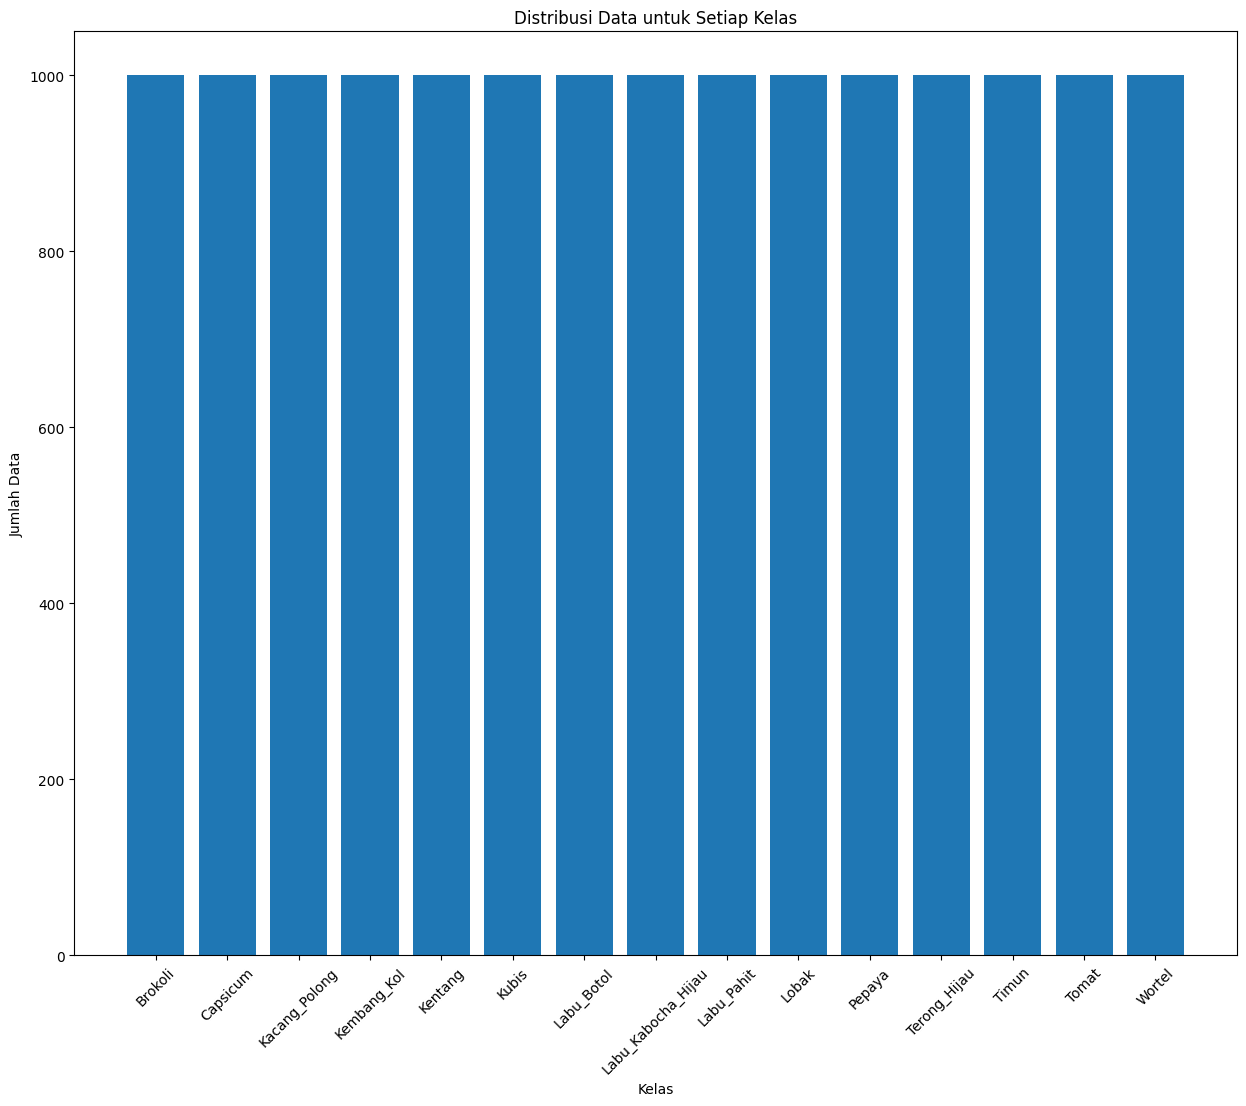

In [6]:
# Data distribusi data pada setiap kelas
class_names = df_count_train["class"]
class_counts = df_count_train["count"]

# Membuat plot bar untuk distribusi data pada setiap kelas
plt.figure(figsize=(15, 12))
plt.bar(class_names, class_counts)
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Data untuk Setiap Kelas")
plt.xticks(rotation=45)  # Memutar label sumbu x untuk kelas yang panjang
plt.show()

In [175]:
# Visualize the class distribution
fig = px.pie(names=class_names, values=class_dis, title="Distribusi Data untuk Setiap Kelas", hole=0.4)
fig.update_layout(title_x=0.5)  # Mengatur posisi judul
fig.update_traces(textinfo='percent+label', insidetextfont=dict(color='white'))  # Mengubah warna teks persentase
fig.show()



# **Menampilkan Datasets Pelatihan Pada Setiap *Class* Secara Acak**

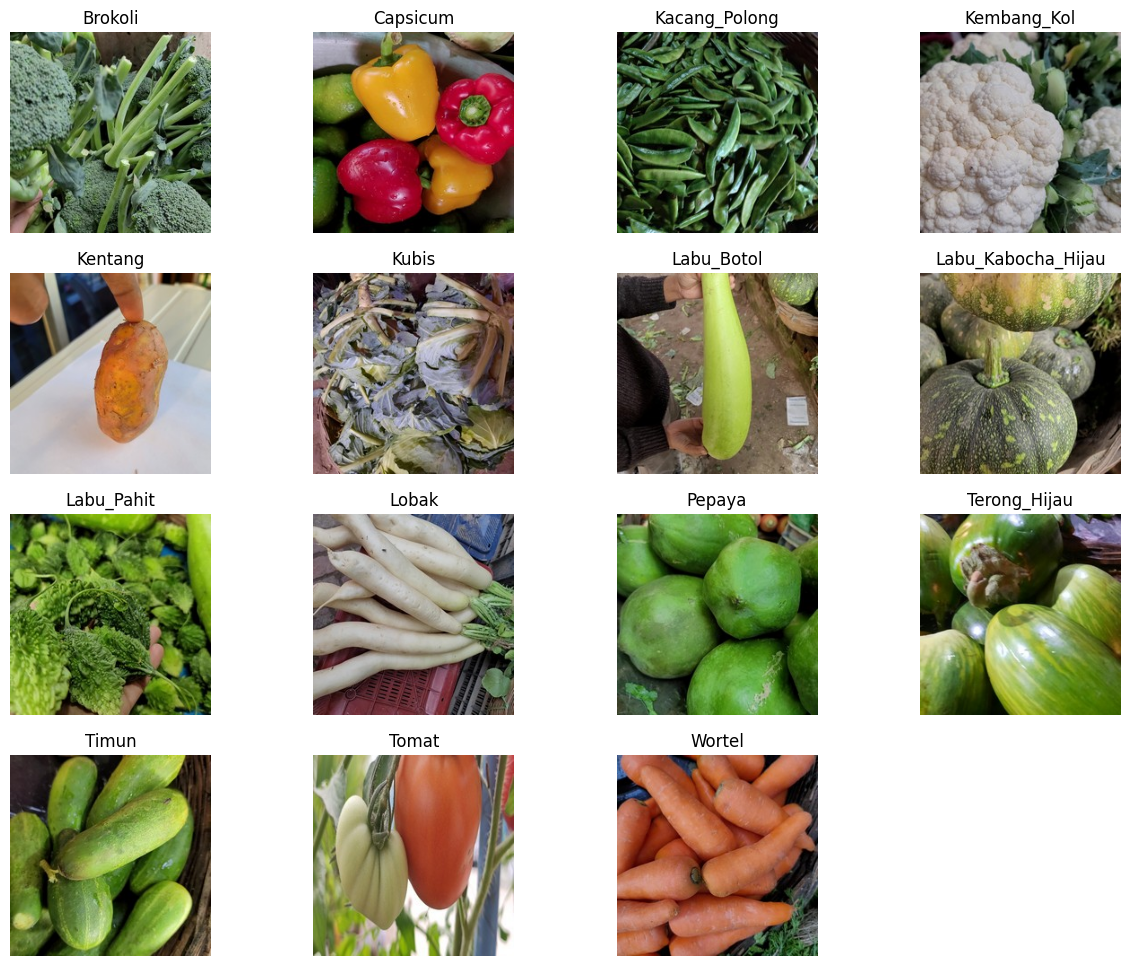

In [8]:
## Viz Random Sample from each class
plt.figure(figsize=(15, 12))
# iterate over dictionary items (class label, image array)
for i, (cls,img) in enumerate(image_dict.items()):
    # create a subplot axis
    ax = plt.subplot(4, 4, i + 1)
    # plot each image
    plt.imshow(img)
    # set "class name" along with "image size" as title
    plt.title(f'{cls}')
    plt.axis("off")

# **Data Preparation**

In [177]:
print('\nLoading Train Data...')
train_data = tf.keras.utils.image_dataset_from_directory(
    "Datasets/train", shuffle = True,
)

print('\nLoading Validasi Data...')
val_data = tf.keras.utils.image_dataset_from_directory(
    "Datasets/train", shuffle = False,
)

print('\nLoading Testing Data...')
test_data = tf.keras.utils.image_dataset_from_directory(
    "Datasets/train", shuffle = False,
)



Loading Train Data...
Found 5000 files belonging to 5 classes.

Loading Validasi Data...
Found 5000 files belonging to 5 classes.

Loading Testing Data...
Found 5000 files belonging to 5 classes.


In [178]:
height, width = 224, 224

# Data Processing Stage with resizing and rescaling operations
data_preprocess = keras.Sequential(
    name="data_preprocess",
    layers=[
        layers.Resizing(height, width),  # Shape Preprocessing
        layers.Rescaling(1.0 / 255),  # Value Preprocessing
    ]
)

# Perform Data Processing on the train, val, dan test
train_ds = train_data.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocess(x), y))

# **Building a CNN model**

## **Training a simple CNN (Baseline Model)**

In [179]:
model_base_cnn = keras.Sequential(
    name="model_base_cnn",
    layers=[
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(units=256, activation='relu'),
        layers.Dense(units=n_classes, activation='softmax')
    ]
)

In [183]:
model_base_cnn.summary()

Model: "model_base_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 200704)            0         
                                                                 
 dense_4 (Dense)             (None, 256)               51380480  
                                                                 
 dense_5 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 51382213 (196.01 MB)
Trainable params: 51382213 (196.01 MB)
Non-trainable params: 0 (0.00 Byte)
________

In [185]:
# Compile and fit the model

# menghentikan pelatihan secara otomatis jika tidak ada perbaikan dalam metrik yang diawasi (misalnya, loss validasi)
# dalam beberapa epoch berturut-turut,
# sehingga mencegah overfitting (masalah dalam machine learning ketika model jaringan saraf atau model lainnya
# terlalu baik dalam mempelajari data pelatihan,
# sehingga ia menggambarkan detail dan kebisingan dalam data pelatihan yang tidak mencerminkan pola umum dalam data. ).
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks


# secara keseluruhan, syntax ini digunakan untuk melatih model jaringan saraf 
# dengan pemantauan kinerja menggunakan callback EarlyStopping
# untuk mencegah overfitting dan mengoptimalkan kinerja model.
# Selama pelatihan, model akan menghitung loss, akurasi, dan metrik lainnya, 
# serta memperbarui bobotnya menggunakan optimizer Adam.
model_base_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [186]:
epochs = 10
model_base_cnn_fit = model_base_cnn.fit(train_ds, verbose=1, validation_data=val_ds, epochs=epochs, callbacks=early_stopping)

Epoch 1/10
157/157 [==============================] - 181s 1s/step - loss: 2.1925 - accuracy: 0.7716 - val_loss: 0.1359 - val_accuracy: 0.9616
Epoch 2/10
157/157 [==============================] - 203s 1s/step - loss: 0.1215 - accuracy: 0.9652 - val_loss: 0.0865 - val_accuracy: 0.9674
Epoch 3/10
157/157 [==============================] - 180s 1s/step - loss: 0.0414 - accuracy: 0.9894 - val_loss: 0.0148 - val_accuracy: 0.9966
Epoch 4/10
157/157 [==============================] - 175s 1s/step - loss: 0.0174 - accuracy: 0.9954 - val_loss: 0.0073 - val_accuracy: 0.9990
Epoch 5/10
157/157 [==============================] - 179s 1s/step - loss: 0.0102 - accuracy: 0.9976 - val_loss: 0.0049 - val_accuracy: 0.9994
Epoch 6/10
157/157 [==============================] - 176s 1s/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 7/10
157/157 [==============================] - 167s 1s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000

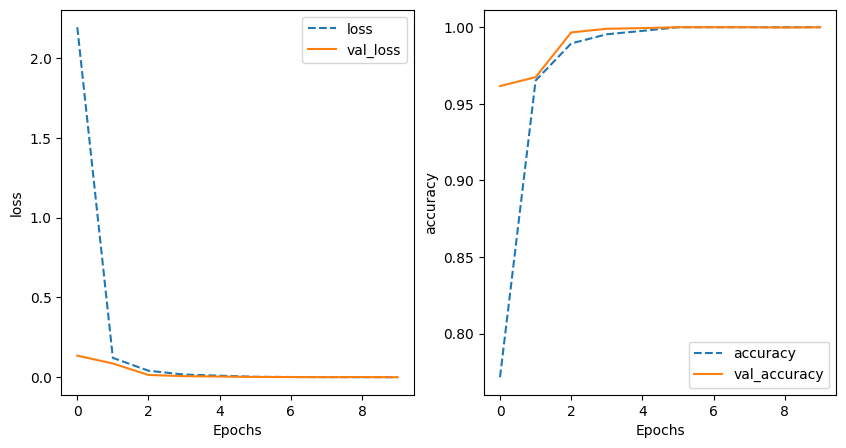

In [187]:
training_plot(['loss', 'accuracy'], model_base_cnn_fit)

In [188]:
testAccuracy(model_base_cnn)

157/157 [==============================] - 33s 205ms/step

Test Accuracy: 100.00%



157/157 [==============================] - 26s 166ms/step


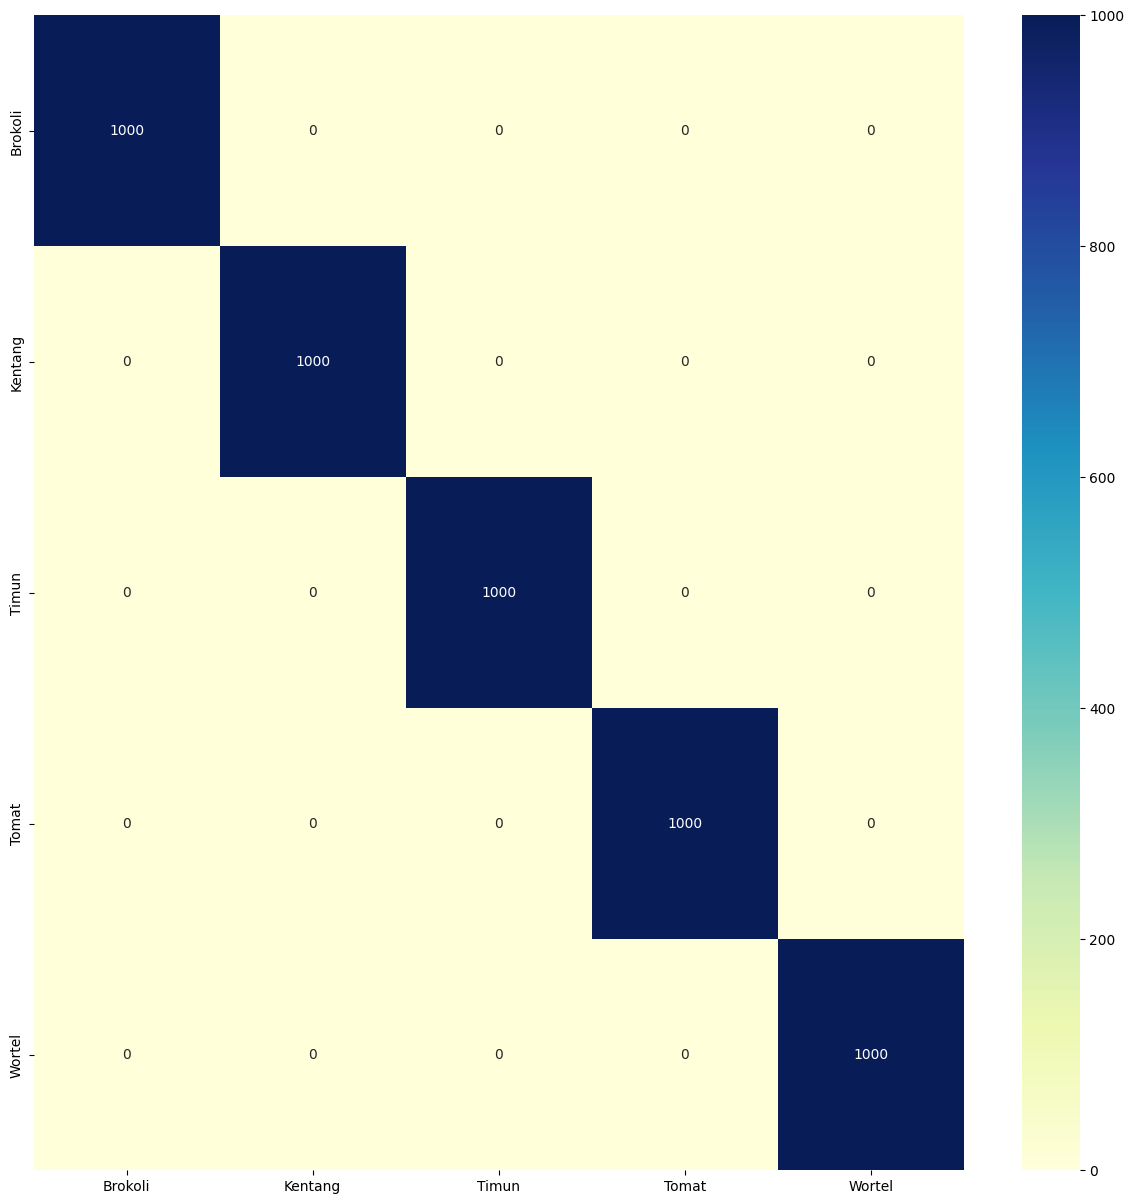

In [189]:
ConfusionMatrix(model_base_cnn, test_ds, test_data.class_names)

In [190]:
# Predict the accuracy for the test set

model_base_cnn.evaluate(test_ds)

157/157 [==============================] - 32s 199ms/step - loss: 6.2448e-04 - accuracy: 1.0000


[0.0006244758842512965, 1.0]

157/157 [==============================] - 33s 206ms/step


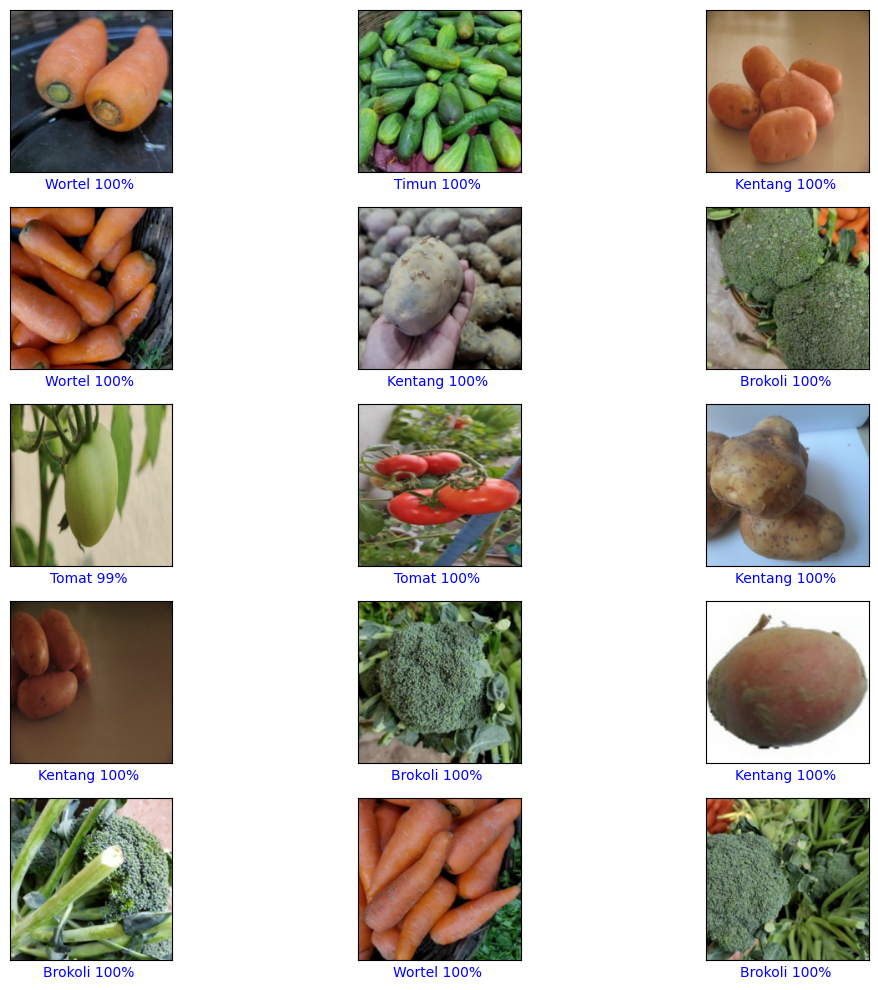

In [191]:
predictions(model_base_cnn)

1/1 [==============================] - 0s 222ms/step


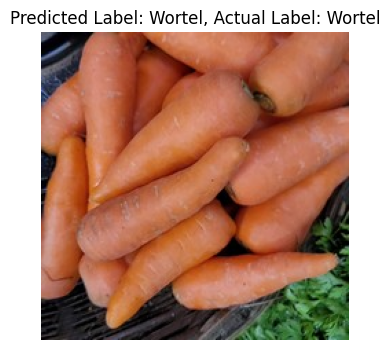

In [194]:
# Testing the Model

test_image_path = 'Datasets/test_other_image/Wortel/1090.jpg'

def generate_predictions(test_image_path, actual_label):

    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(224, 224))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model_base_cnn.predict(test_img_input))
    predicted_vegetable = class_names[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='Wortel')

In [195]:
import pickle

filename = 'ClassificationVegetable.sav'
pickle.dump(model_base_cnn, open(filename, 'wb'))